<h2 style='text-align: center;'> Technology Capstone Research Project PG (11522) </h2>
<h3 style='text-align: center;'> Prompt Engineering for Code Generation: Experiment Exploratory Data Analysis </h3>
<h4 style='text-align: center;'> Project ID: 2024-S1-50 </h4>
<h4 style='text-align: center;'> Group ID: 11522-24S1-41 </h4>
<h4 style='text-align: center;'> Author: Pauline Armamento </h4>


Exploratory Data Analysis (EDA) was performed by summarising key statistics, visualising trends, and identifying potential outliers or patterns from the compiled results of all conducted experiments for this project. 

In [7]:
# Initializations 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
# os.getcwd()

### Data Description

Three DataFrames (df_cot, df_zero, df_few) were created from the compiled results in csv files from our project on prompt engineering for LLM-based code generation.

All dataframes contain 378 different test data with their equivalent evaluation metrics results to assess the quality of the generated code. We've combined all dataframes into one working dataframe that summed to 1134 test data and 13 columns ['Dataset', 'Technique', 'Application', 'Test_Data', 'Task_ID', 'Model', 'ChatGPT_Reponse_Time', 'Execution_Time', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Exact_Match']

In [3]:
# Define the directory paths
df_cot = pd.read_csv('experiment_results_CoT.csv')
df_zero = pd.read_csv('experiment_results_Zero.csv')
df_few = pd.read_csv('experiment_results_Few.csv')


print("DataFrame: df_cot")
print("Number of rows:", df_cot.shape[0])
print("Column names:", df_cot.columns.tolist())
print()

print("DataFrame: df_zero")
print("Number of rows:", df_zero.shape[0])
print("Column names:", df_zero.columns.tolist())
print()

print("DataFrame: df_few")
print("Number of rows:", df_few.shape[0])
print("Column names:", df_few.columns.tolist())


DataFrame: df_cot
Number of rows: 378
Column names: ['Dataset', 'Technique', 'Application', 'Test_Data', 'Task_ID', 'Model', 'ChatGPT_Reponse_Time', 'Execution_Time', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Exact_Match']

DataFrame: df_zero
Number of rows: 378
Column names: ['Dataset', 'Technique', 'Application', 'Test_Data', 'Task_ID', 'Model', 'ChatGPT_Reponse_Time', 'Execution_Time', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Exact_Match']

DataFrame: df_few
Number of rows: 378
Column names: ['Dataset', 'Technique', 'Application', 'Test_Data', 'Task_ID', 'Model', 'ChatGPT_Reponse_Time', 'Execution_Time', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Exact_Match']


In [10]:
# Combine all DataFrames into one
combined_df = pd.concat([df_cot, df_zero, df_few], ignore_index=True)

print("DataFrame: combined_df")
print("Number of rows:", combined_df.shape[0])
print("Number of columns:", combined_df.shape[1])
print("Column names:", combined_df.columns.tolist())

DataFrame: combined_df
Number of rows: 1134
Number of columns: 13
Column names: ['Dataset', 'Technique', 'Application', 'Test_Data', 'Task_ID', 'Model', 'ChatGPT_Reponse_Time', 'Execution_Time', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Exact_Match']


#### Verify Column Contents

In [11]:
# Define columns to check contents
columns_to_check = ['Dataset', 'Technique', 'Application', 'Test_Data','Model'] 

# Print Column Contents
for column in columns_to_check:
    print(f"Contents of column '{column}':")
    print(combined_df[column].unique())
    print()


Contents of column 'Dataset':
['HumanEval' 'BIG Bench' 'MBPP']

Contents of column 'Technique':
['CoT' 'Zero Shot' 'Few Shot']

Contents of column 'Application':
['Function' 'Snippet']

Contents of column 'Test_Data':
['Test Data 1' 'Test Data 2' 'Test Data 3']

Contents of column 'Model':
['Model 1' 'Model 2' 'Model 3']



In [12]:
# Define columns to check contents
columns_to_check = ['Dataset', 'Technique', 'Application', 'Test_Data', 'Model']

# Print column value counts
for column in columns_to_check:
    print(f"Value counts for column '{column}':")
    print(combined_df[column].value_counts())
    print()


Value counts for column 'Dataset':
MBPP         432
BIG Bench    378
HumanEval    324
Name: Dataset, dtype: int64

Value counts for column 'Technique':
CoT          378
Zero Shot    378
Few Shot     378
Name: Technique, dtype: int64

Value counts for column 'Application':
Function    613
Snippet     521
Name: Application, dtype: int64

Value counts for column 'Test_Data':
Test Data 1    378
Test Data 2    378
Test Data 3    378
Name: Test_Data, dtype: int64

Value counts for column 'Model':
Model 1    378
Model 2    378
Model 3    378
Name: Model, dtype: int64



## Data Pre-processing

We checked and treated the data for missing values. These missing values are due to errors in the code produced by the LLM leading to the unsuccessful generation of the desired output.

In [13]:
# Check for Missing values

print("Missing values in combined_df:")
print(combined_df.isna().sum())


Missing values in combined_df:
Dataset                  0
Technique                0
Application              0
Test_Data                0
Task_ID                  0
Model                    0
ChatGPT_Reponse_Time    18
Execution_Time          21
Accuracy                21
Precision               21
Recall                  21
F1_Score                21
Exact_Match             21
dtype: int64


In [14]:
# Check for missing values in each DataFrame
print("Missing values in df_cot:")
print(df_cot.isna().sum())

print("\nMissing values in df_zero:")
print(df_zero.isna().sum())

print("\nMissing values in df_few:")
print(df_few.isna().sum())

Missing values in df_cot:
Dataset                 0
Technique               0
Application             0
Test_Data               0
Task_ID                 0
Model                   0
ChatGPT_Reponse_Time    0
Execution_Time          0
Accuracy                0
Precision               0
Recall                  0
F1_Score                0
Exact_Match             0
dtype: int64

Missing values in df_zero:
Dataset                 0
Technique               0
Application             0
Test_Data               0
Task_ID                 0
Model                   0
ChatGPT_Reponse_Time    9
Execution_Time          9
Accuracy                9
Precision               9
Recall                  9
F1_Score                9
Exact_Match             9
dtype: int64

Missing values in df_few:
Dataset                  0
Technique                0
Application              0
Test_Data                0
Task_ID                  0
Model                    0
ChatGPT_Reponse_Time     9
Execution_Time          12
A

In [15]:
# Replace missing values with 0
combined_df.fillna(0, inplace=True)

print("Missing values in combined_df:")
print(combined_df.isna().sum())

Missing values in combined_df:
Dataset                 0
Technique               0
Application             0
Test_Data               0
Task_ID                 0
Model                   0
ChatGPT_Reponse_Time    0
Execution_Time          0
Accuracy                0
Precision               0
Recall                  0
F1_Score                0
Exact_Match             0
dtype: int64


In [16]:
# Save the DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)


## Exploring Data

The data's time factors were investigated due to the likelihood of containing potential outliers, as they were recorded based on user usage, which varies from one user to another. 

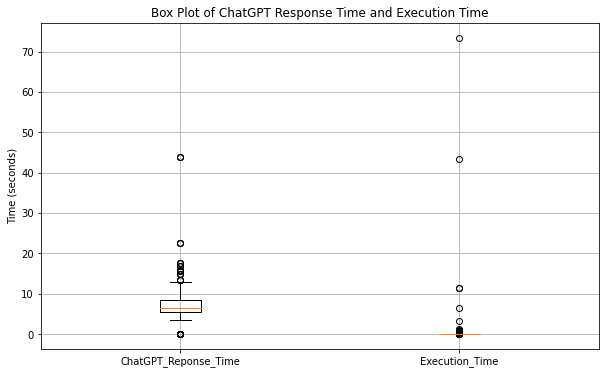

In [18]:
# Define time data
time_data = [combined_df['ChatGPT_Reponse_Time'], combined_df['Execution_Time']]

# Visualize box plot
plt.figure(figsize=(10, 6))
plt.boxplot(time_data, labels=['ChatGPT_Reponse_Time', 'Execution_Time'])
plt.title('Box Plot of ChatGPT Response Time and Execution Time')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()


### Treat Outliers

We removed evaluated outliers as they can potentially skew our results.

In [19]:
# Define the indices to remove
indices_to_remove = [276, 277, 278, 1080, 1081, 1082, 194, 940]

# Remove the rows with specified indices
combined_df = combined_df.drop(indices_to_remove)

# Check the DataFrame after removal
# print(combined_df)



We have retained all test data that we believe have contributing impact to our results.

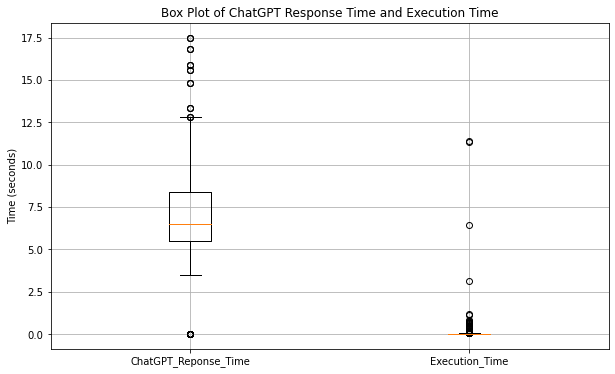

In [21]:
# Define the data for box plot
time_data2 = [combined_df['ChatGPT_Reponse_Time'], combined_df['Execution_Time']]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(time_data2, labels=['ChatGPT_Reponse_Time', 'Execution_Time'])
plt.title('Box Plot of ChatGPT Response Time and Execution Time')
plt.ylabel('Time (seconds)')
plt.grid(True)

# Show the plot
plt.show()

In [63]:
# Compute statistical details for 'ChatGPT_Reponse_Time'
chatgpt_stats = {
    'Mean': np.mean(combined_df['ChatGPT_Reponse_Time']),
    'Lower Quartile (25th percentile)': np.percentile(combined_df['ChatGPT_Reponse_Time'], 25),
    'Upper Quartile (75th percentile)': np.percentile(combined_df['ChatGPT_Reponse_Time'], 75),
    'Lower Tail (Minimum)': np.min(combined_df['ChatGPT_Reponse_Time']),
    'Upper Tail (Maximum)': np.max(combined_df['ChatGPT_Reponse_Time'])
}

# Compute statistical details for 'Execution_Time'
execution_stats = {
    'Mean': np.mean(combined_df['Execution_Time']),
    'Lower Quartile (25th percentile)': np.percentile(combined_df['Execution_Time'], 25),
    'Upper Quartile (75th percentile)': np.percentile(combined_df['Execution_Time'], 75),
    'Lower Tail (Minimum)': np.min(combined_df['Execution_Time']),
    'Upper Tail (Maximum)': np.max(combined_df['Execution_Time'])
}

# Print statistical details
print("Statistical Details for ChatGPT Response Time:")
for key, value in chatgpt_stats.items():
    print(f"{key}: {value}")

print("\nStatistical Details for Execution Time:")
for key, value in execution_stats.items():
    print(f"{key}: {value}")


Statistical Details for ChatGPT Response Time:
Mean: 7.031181172291294
Lower Quartile (25th percentile): 5.47
Upper Quartile (75th percentile): 8.4
Lower Tail (Minimum): 0.0
Upper Tail (Maximum): 17.5

Statistical Details for Execution Time:
Mean: 0.051972174364472594
Lower Quartile (25th percentile): 0.0
Upper Quartile (75th percentile): 0.017665
Lower Tail (Minimum): 0.0
Upper Tail (Maximum): 11.41488


In [64]:
# Compute the mean for 'ChatGPT Response Time' and 'Execution Time' grouped by 'Technique' and 'Application'
mean_time_by_technique_application = combined_df.groupby(['Technique', 'Application']).agg({
    'ChatGPT_Reponse_Time': 'mean',
    'Execution_Time': 'mean'
}).reset_index()

# Print the result
print(mean_time_by_technique_application)


   Technique Application  ChatGPT_Reponse_Time  Execution_Time
0        CoT    Function              6.973175        0.067328
1        CoT     Snippet              7.603405        0.000624
2   Few Shot    Function              7.591290        0.138808
3   Few Shot     Snippet              6.720638        0.000347
4  Zero Shot    Function              7.097284        0.079120
5  Zero Shot     Snippet              5.870000        0.004225


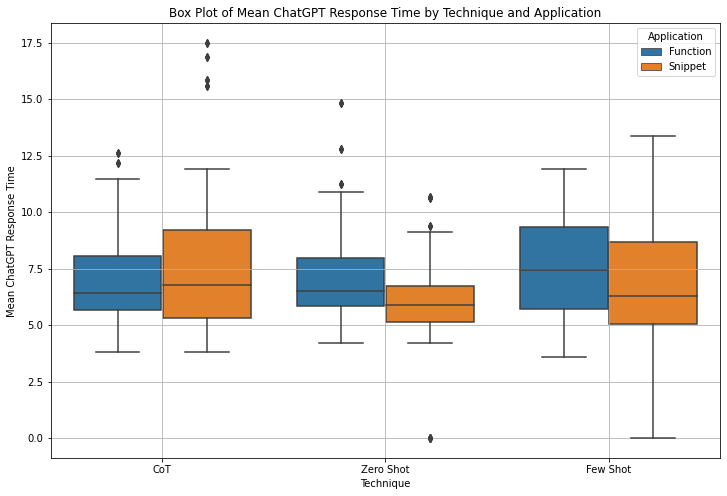

In [22]:
# Box Plot for Time Factors by Technique and Application
plt.figure(figsize=(12, 8))
sns.boxplot(x='Technique', y='ChatGPT_Reponse_Time', hue='Application', data=combined_df)
plt.title('Box Plot of Mean ChatGPT Response Time by Technique and Application')
plt.xlabel('Technique')
plt.ylabel('Mean ChatGPT Response Time')
plt.legend(title='Application')
plt.grid(True)
plt.show()




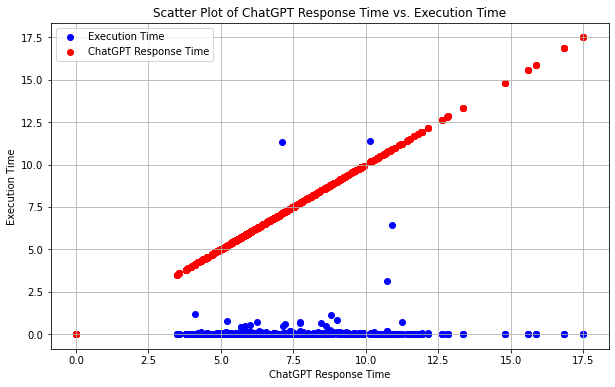

In [23]:
# Scatter Plot for Time Factors by Technique and Application
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['ChatGPT_Reponse_Time'], combined_df['Execution_Time'], c='blue', label='Execution Time')
plt.scatter(combined_df['ChatGPT_Reponse_Time'], combined_df['ChatGPT_Reponse_Time'], c='red', label='ChatGPT Response Time')

plt.xlabel('ChatGPT Response Time')
plt.ylabel('Execution Time')
plt.title('Scatter Plot of ChatGPT Response Time vs. Execution Time')
plt.legend()
plt.grid(True)
plt.show()


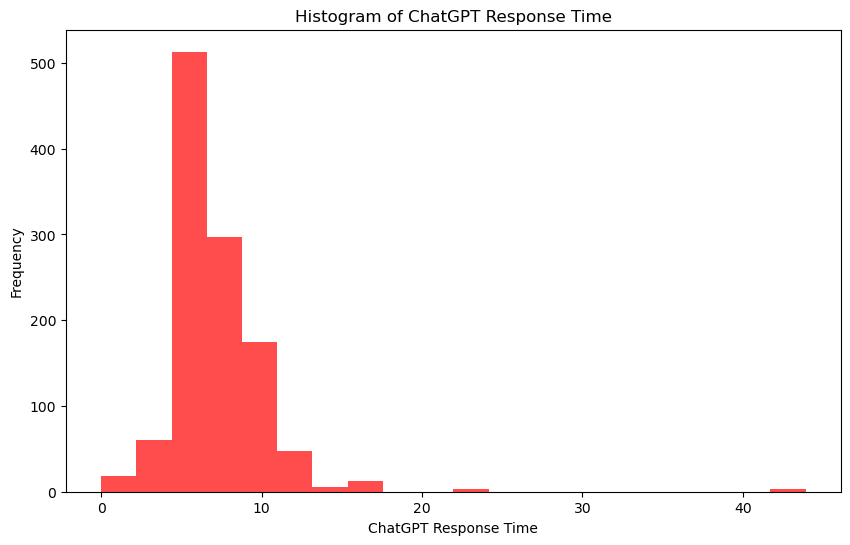

In [11]:
# Create a histogram for ChatGPT Response Time
plt.figure(figsize=(10, 6))
plt.hist(combined_df['ChatGPT_Reponse_Time'], bins=20, color='red', alpha=0.7)
plt.xlabel('ChatGPT Response Time')
plt.ylabel('Frequency')
plt.title('Histogram of ChatGPT Response Time')
plt.grid(False)
plt.show()


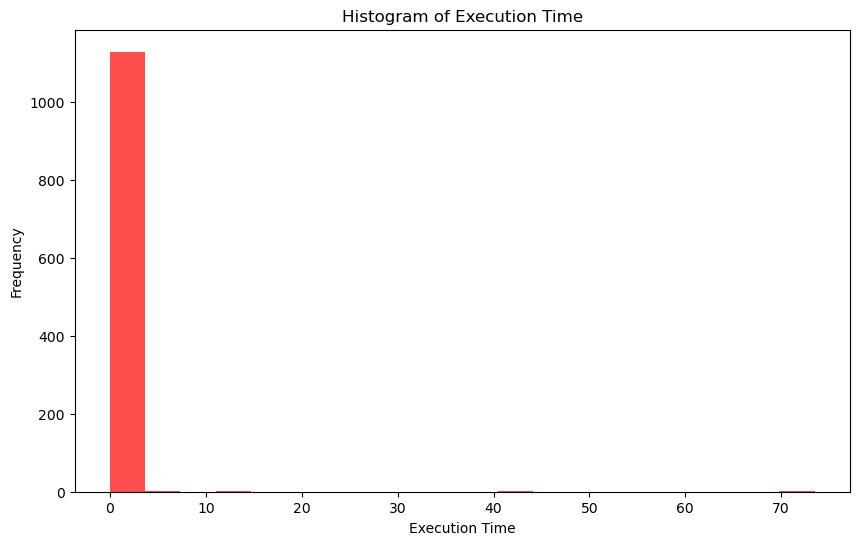

In [12]:
# Create a histogram for Execution Time
plt.figure(figsize=(10, 6))
plt.hist(combined_df['Execution_Time'], bins=20, color='red', alpha=0.7)
plt.xlabel('Execution Time')
plt.ylabel('Frequency')
plt.title('Histogram of Execution Time')
plt.grid(False)
plt.show()


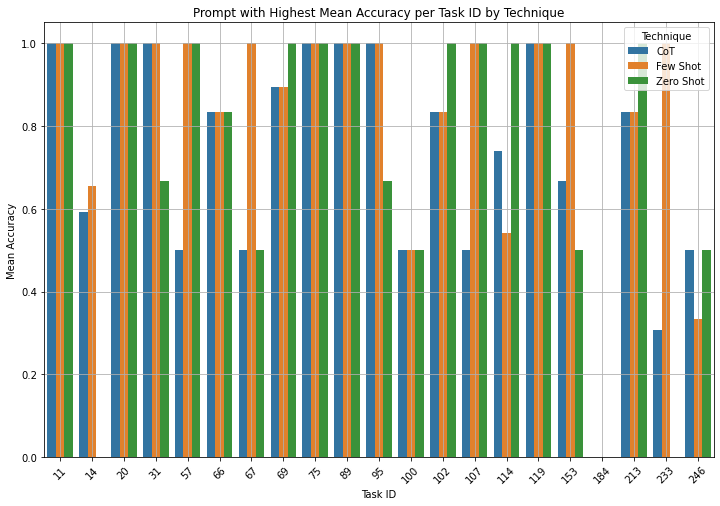

In [37]:
# Check Task ID mean accuracy by Technique

# Group the DataFrame by 'Task_ID', 'Technique', and 'Model'
mean_accuracy_per_task_technique_prompt = combined_df.groupby(['Task_ID', 'Technique', 'Model'])['Accuracy'].mean()

mean_accuracy_per_task_technique_prompt = mean_accuracy_per_task_technique_prompt.reset_index()

max_mean_accuracy_prompts = mean_accuracy_per_task_technique_prompt.loc[mean_accuracy_per_task_technique_prompt.groupby(['Task_ID', 'Technique'])['Accuracy'].idxmax()]

# Show bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Task_ID', y='Accuracy', hue='Technique', data=max_mean_accuracy_prompts)
plt.xlabel('Task ID')
plt.ylabel('Mean Accuracy')
plt.title('Prompt with Highest Mean Accuracy per Task ID by Technique')
plt.legend(title='Technique')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Correlation Matrix:
                       Task_ID  ChatGPT_Reponse_Time  Execution_Time  \
Task_ID               1.000000             -0.041123        0.000477   
ChatGPT_Reponse_Time -0.041123              1.000000        0.054235   
Execution_Time        0.000477              0.054235        1.000000   
Accuracy             -0.211423              0.184927        0.040166   
Precision            -0.246223              0.146166        0.037134   
Recall               -0.255123              0.155252        0.037985   
F1_Score             -0.248558              0.157010        0.038601   
Exact_Match          -0.230965              0.180508        0.042695   

                      Accuracy  Precision    Recall  F1_Score  Exact_Match  
Task_ID              -0.211423  -0.246223 -0.255123 -0.248558    -0.230965  
ChatGPT_Reponse_Time  0.184927   0.146166  0.155252  0.157010     0.180508  
Execution_Time        0.040166   0.037134  0.037985  0.038601     0.042695  
Accuracy              1

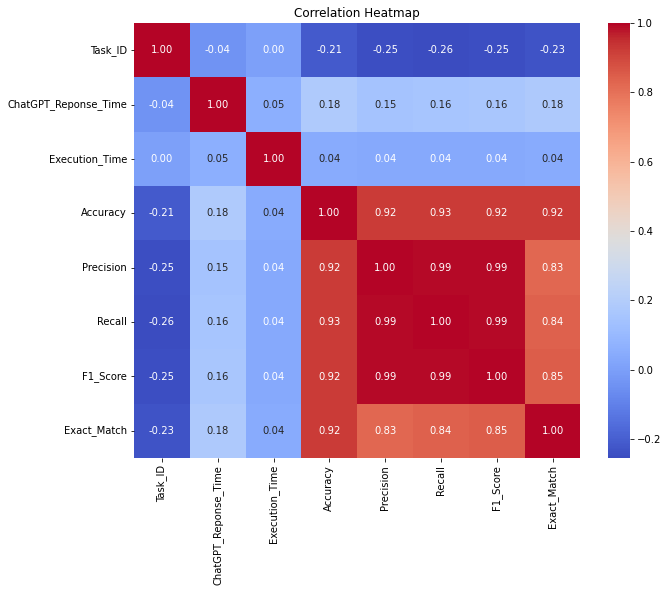

In [24]:
# Compute the correlation matrix
correlation_matrix = combined_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix 
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Research Problems

We identified some research problems that we want to explore in our data. This gives us insights to which prompt engineering technique is considered as most efficient based on their accuracy results.

In [61]:
# Which model performs best (highest accuracy, F1 score, etc.) across different datasets (HumanEval, BIG Bench, MBPP)?

# Group the DataFrame by 'Model' and calculate the mean of each metric
model_performance = combined_df.groupby('Model').mean()

# Print the mean metrics for each model
print(model_performance)


            Task_ID  ChatGPT_Reponse_Time  Execution_Time  Accuracy  \
Model                                                                 
Model 1  103.392000              7.038800        0.080750  0.708613   
Model 2  103.478723              6.988457        0.039339  0.655904   
Model 3  103.208000              7.066400        0.035862  0.627920   

         Precision    Recall  F1_Score  Exact_Match  
Model                                                
Model 1   0.710373  0.706347  0.704880     0.682667  
Model 2   0.659814  0.656463  0.652394     0.622340  
Model 3   0.632240  0.628880  0.624987     0.589333  


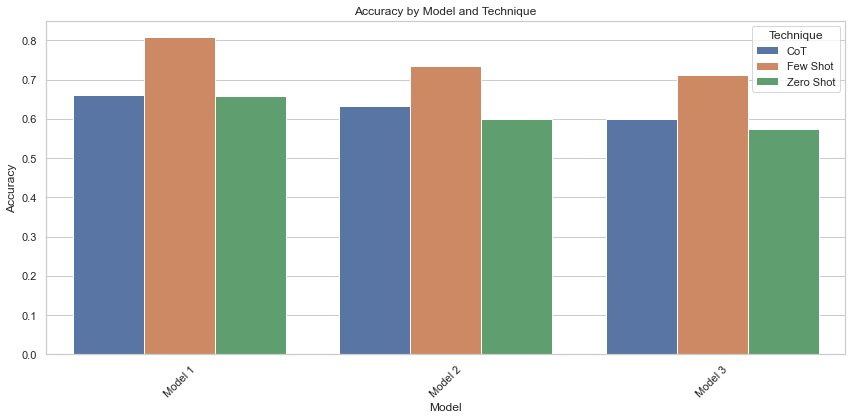

In [80]:
# How does the performance of each model vary depending on the technique used (CoT, Zero Shot, Few Shot)?

# Group the DataFrame by both 'Model' and 'Technique' and calculate the mean of each metric
model_technique_performance = combined_df.groupby(['Model', 'Technique']).mean()

model_technique_performance.reset_index(inplace=True)

# Plot the performance metrics for each model and technique
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Model', y='Accuracy', hue='Technique', data=model_technique_performance)
plt.title('Accuracy by Model and Technique')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Technique', loc='upper right')
plt.tight_layout()
plt.show()


In [81]:
print(model_technique_performance)

     Model  Technique     Task_ID  ChatGPT_Reponse_Time  Execution_Time  \
0  Model 1        CoT  103.095238              7.274286        0.021071   
1  Model 1   Few Shot  104.000000              7.172927        0.114012   
2  Model 1  Zero Shot  103.095238              6.672381        0.107958   
3  Model 2        CoT  103.672000              7.265200        0.022901   
4  Model 2   Few Shot  103.672000              7.213680        0.075675   
5  Model 2  Zero Shot  103.095238              6.490476        0.019598   
6  Model 3        CoT  103.439024              7.315854        0.059536   
7  Model 3   Few Shot  103.095238              7.075238        0.019053   
8  Model 3  Zero Shot  103.095238              6.814048        0.029559   

   Accuracy  Precision    Recall  F1_Score  Exact_Match  
0  0.660873   0.647857  0.636508  0.641349     0.603175  
1  0.809268   0.819187  0.818537  0.815447     0.796748  
2  0.658095   0.666667  0.666667  0.660476     0.650794  
3  0.633840   0.6

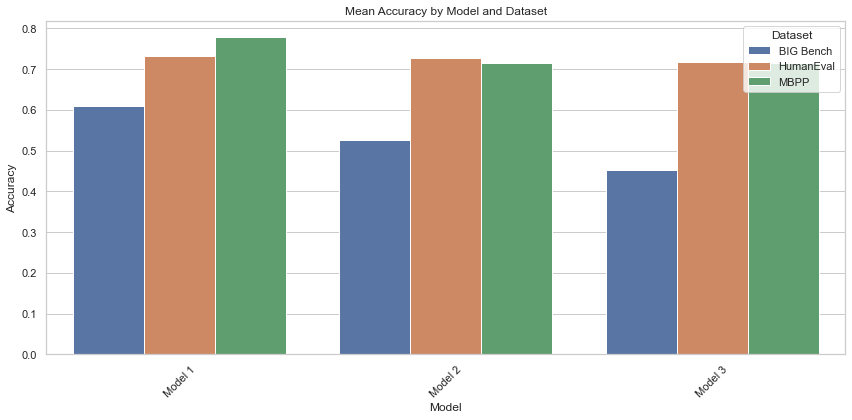

In [82]:
# How does the performance of each model vary depending on the dataset used (MBPP, HumanEval, BIG Bench)?

# Group the DataFrame by both 'Model' and 'Dataset' and calculate the mean of each metric
model_dataset_performance = combined_df.groupby(['Model', 'Dataset']).mean()

model_dataset_performance.reset_index(inplace=True)

# Visualize the performance metrics for each model and dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=model_dataset_performance)
plt.title('Mean Accuracy by Model and Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Dataset', loc='upper right')
plt.tight_layout()
plt.show()



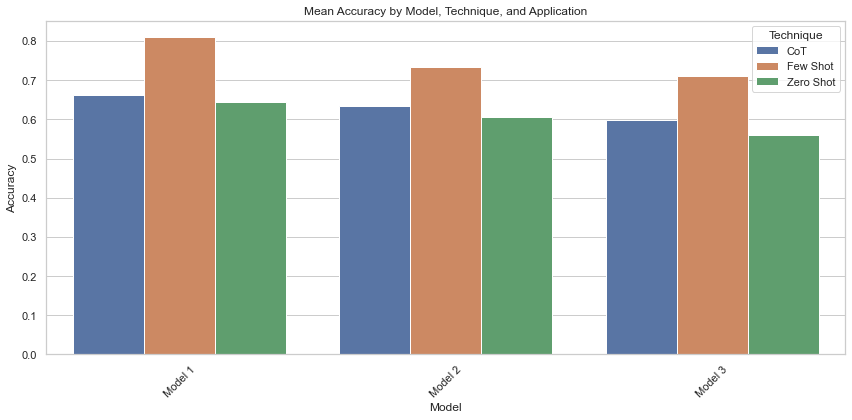

In [94]:
# How does the performance of each model vary depending on the technique used (CoT, Zero Shot, Few Shot) and Application (Function, Snippet)?

# Group the DataFrame by 'Model', 'Technique', and 'Application' and calculate the mean of each metric
model_technique_application_performance = combined_df.groupby(['Model', 'Technique', 'Application']).mean()

model_technique_application_performance.reset_index(inplace=True)

# Visualize the performance metrics for each model, technique, and application
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Technique', data=model_technique_application_performance, ci=None)
plt.title('Mean Accuracy by Model, Technique, and Application')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Technique', loc='upper right')
plt.tight_layout()
plt.show()



In [95]:
print(model_technique_application_performance) 

      Model  Technique Application     Task_ID  ChatGPT_Reponse_Time  \
0   Model 1        CoT    Function  103.095238              6.999524   
1   Model 1        CoT     Snippet  103.095238              7.549048   
2   Model 1   Few Shot    Function  104.950000              7.791500   
3   Model 1   Few Shot     Snippet  103.095238              6.583810   
4   Model 1  Zero Shot    Function  100.333333              6.980741   
5   Model 1  Zero Shot     Snippet  108.066667              6.117333   
6   Model 2        CoT    Function  103.095238              6.850476   
7   Model 2        CoT     Snippet  104.258065              7.686613   
8   Model 2   Few Shot    Function  103.095238              7.596667   
9   Model 2   Few Shot     Snippet  104.258065              6.824516   
10  Model 2  Zero Shot    Function  100.333333              6.893704   
11  Model 2  Zero Shot     Snippet  108.066667              5.764667   
12  Model 3        CoT    Function  103.095238              7.06

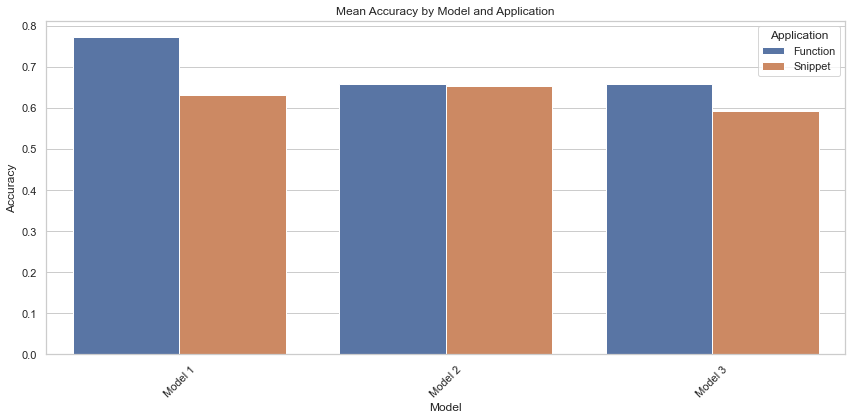

In [85]:
# How does the performance of each model vary depending on the Application (Function, Snippet)?

# Group the DataFrame by 'Model' and 'Application' and calculate the mean of each metric
model_application_performance = combined_df.groupby(['Model', 'Application']).mean()

model_application_performance.reset_index(inplace=True)

# Visualize the performance metrics for each model and application
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Application', data=model_application_performance, ci=None)
plt.title('Mean Accuracy by Model and Application')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Application', loc='upper right')
plt.tight_layout()
plt.show()




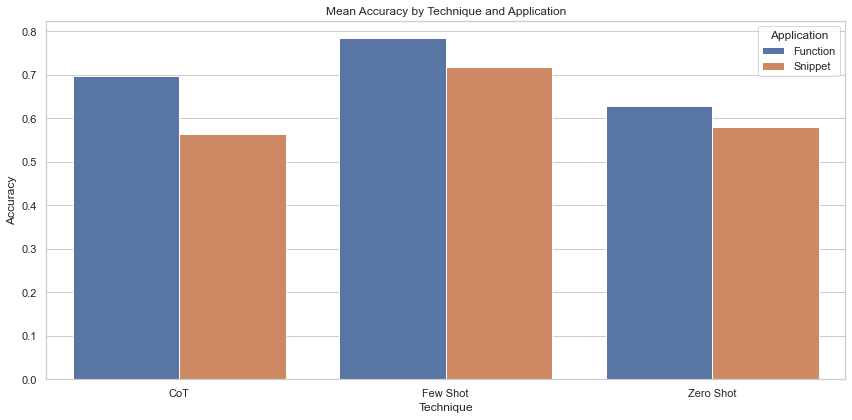

In [92]:
# How does the performance of each technique used (CoT, Zero Shot, Few Shot) vary depending on the Application (Function, Snippet)?

# Group the DataFrame by 'Technique' and 'Application' and calculate the mean of each metric
technique_application_performance = combined_df.groupby(['Technique', 'Application']).mean()

technique_application_performance.reset_index(inplace=True)

# Visualize the performance metrics for each technique and application
plt.figure(figsize=(12, 6))
sns.barplot(x='Technique', y='Accuracy', hue='Application', data=technique_application_performance, ci=None)
plt.title('Mean Accuracy by Technique and Application')
plt.ylabel('Accuracy')
plt.xlabel('Technique')
plt.legend(title='Application', loc='upper right')
plt.tight_layout()
plt.show()



In [93]:
print(technique_application_performance)

   Technique Application     Task_ID  ChatGPT_Reponse_Time  Execution_Time  \
0        CoT    Function  103.095238              6.973175        0.067328   
1        CoT     Snippet  103.713514              7.603405        0.000624   
2   Few Shot    Function  103.693548              7.591290        0.138808   
3   Few Shot     Snippet  103.478723              6.720638        0.000347   
4  Zero Shot    Function  100.333333              7.097284        0.079120   
5  Zero Shot     Snippet  108.066667              5.870000        0.004225   

   Accuracy  Precision    Recall  F1_Score  Exact_Match  
0  0.696984   0.668254  0.666931  0.667513     0.656085  
1  0.564865   0.618865  0.599730  0.607838     0.508108  
2  0.785000   0.789194  0.803226  0.793387     0.736559  
3  0.717181   0.726011  0.710851  0.714521     0.707447  
4  0.627572   0.627572  0.627572  0.611070     0.580247  
5  0.579630   0.555556  0.555556  0.555556     0.607407  


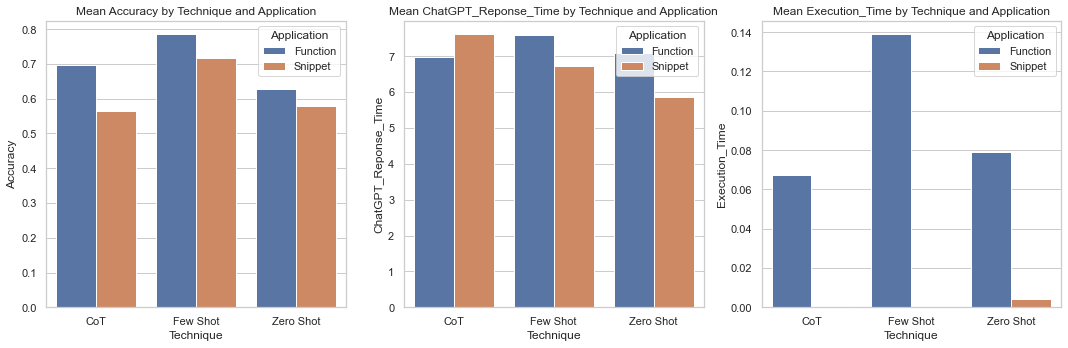

In [87]:
# visualization to include the 'ChatGPT_Reponse_Time' and 'Execution_Time' metrics

# Group the DataFrame by 'Technique' and 'Application' and calculate the mean of each metric
technique_application_performance = combined_df.groupby(['Technique', 'Application']).mean()

technique_application_performance.reset_index(inplace=True)

# Define the metrics to visualize
metrics_to_plot = ['Accuracy', 'ChatGPT_Reponse_Time', 'Execution_Time']

# Visualize the performance metrics for each technique and application
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_to_plot, start=1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Technique', y=metric, hue='Application', data=technique_application_performance, ci=None)
    plt.title(f'Mean {metric} by Technique and Application')
    plt.ylabel(metric)
    plt.xlabel('Technique')
    plt.legend(title='Application', loc='upper right')

plt.tight_layout()
plt.show()


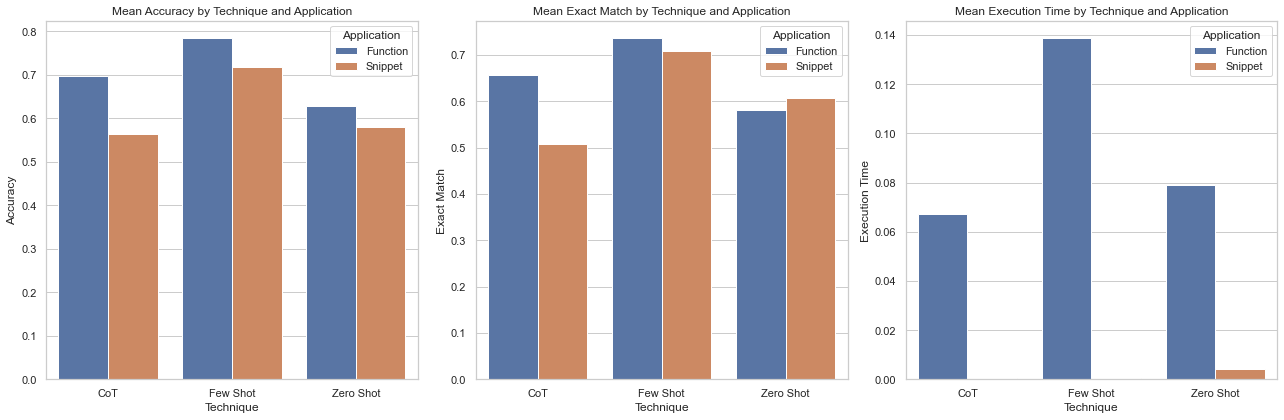

In [88]:
# Visualize the performance metrics for each technique and application
plt.figure(figsize=(18, 6))

# Plot Mean Accuracy
plt.subplot(1, 3, 1)
sns.barplot(x='Technique', y='Accuracy', hue='Application', data=technique_application_performance, ci=None)
plt.title('Mean Accuracy by Technique and Application')
plt.ylabel('Accuracy')
plt.xlabel('Technique')
plt.legend(title='Application', loc='upper right')

# Plot Mean Exact Match
plt.subplot(1, 3, 2)
sns.barplot(x='Technique', y='Exact_Match', hue='Application', data=technique_application_performance, ci=None)
plt.title('Mean Exact Match by Technique and Application')
plt.ylabel('Exact Match')
plt.xlabel('Technique')
plt.legend(title='Application', loc='upper right')

# Plot Mean Execution Time
plt.subplot(1, 3, 3)
sns.barplot(x='Technique', y='Execution_Time', hue='Application', data=technique_application_performance, ci=None)
plt.title('Mean Execution Time by Technique and Application')
plt.ylabel('Execution Time')
plt.xlabel('Technique')
plt.legend(title='Application', loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()


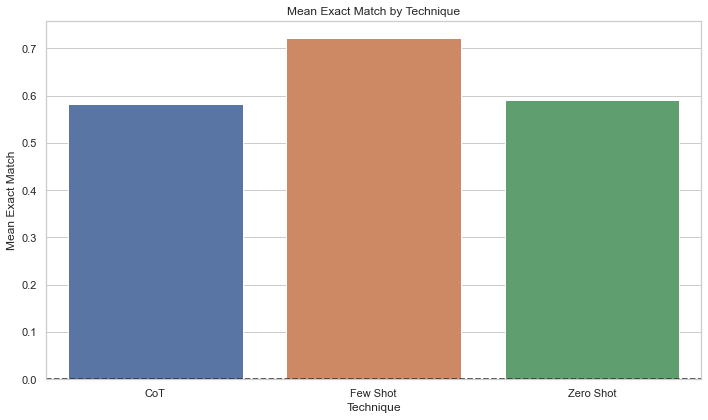

In [89]:
# which technique had the highest exact match

# Group the DataFrame by 'Technique' and calculate the mean of 'Exact_Match'
technique_exact_match = combined_df.groupby('Technique')['Exact_Match'].mean().reset_index()

highest_exact_match_technique = technique_exact_match.loc[technique_exact_match['Exact_Match'].idxmax(), 'Technique']

# Visualize the mean exact match for each technique
plt.figure(figsize=(10, 6))
sns.barplot(x='Technique', y='Exact_Match', data=technique_exact_match, ci=None)
plt.title('Mean Exact Match by Technique')
plt.xlabel('Technique')
plt.ylabel('Mean Exact Match')
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
# plt.text(0, 0.1, f'Highest Exact Match: {highest_exact_match_technique}', fontsize=10, ha='center')
plt.tight_layout()
plt.show()




In [90]:
print(technique_exact_match)

   Technique  Exact_Match
0        CoT     0.582888
1   Few Shot     0.721925
2  Zero Shot     0.589947


<Figure size 864x432 with 0 Axes>

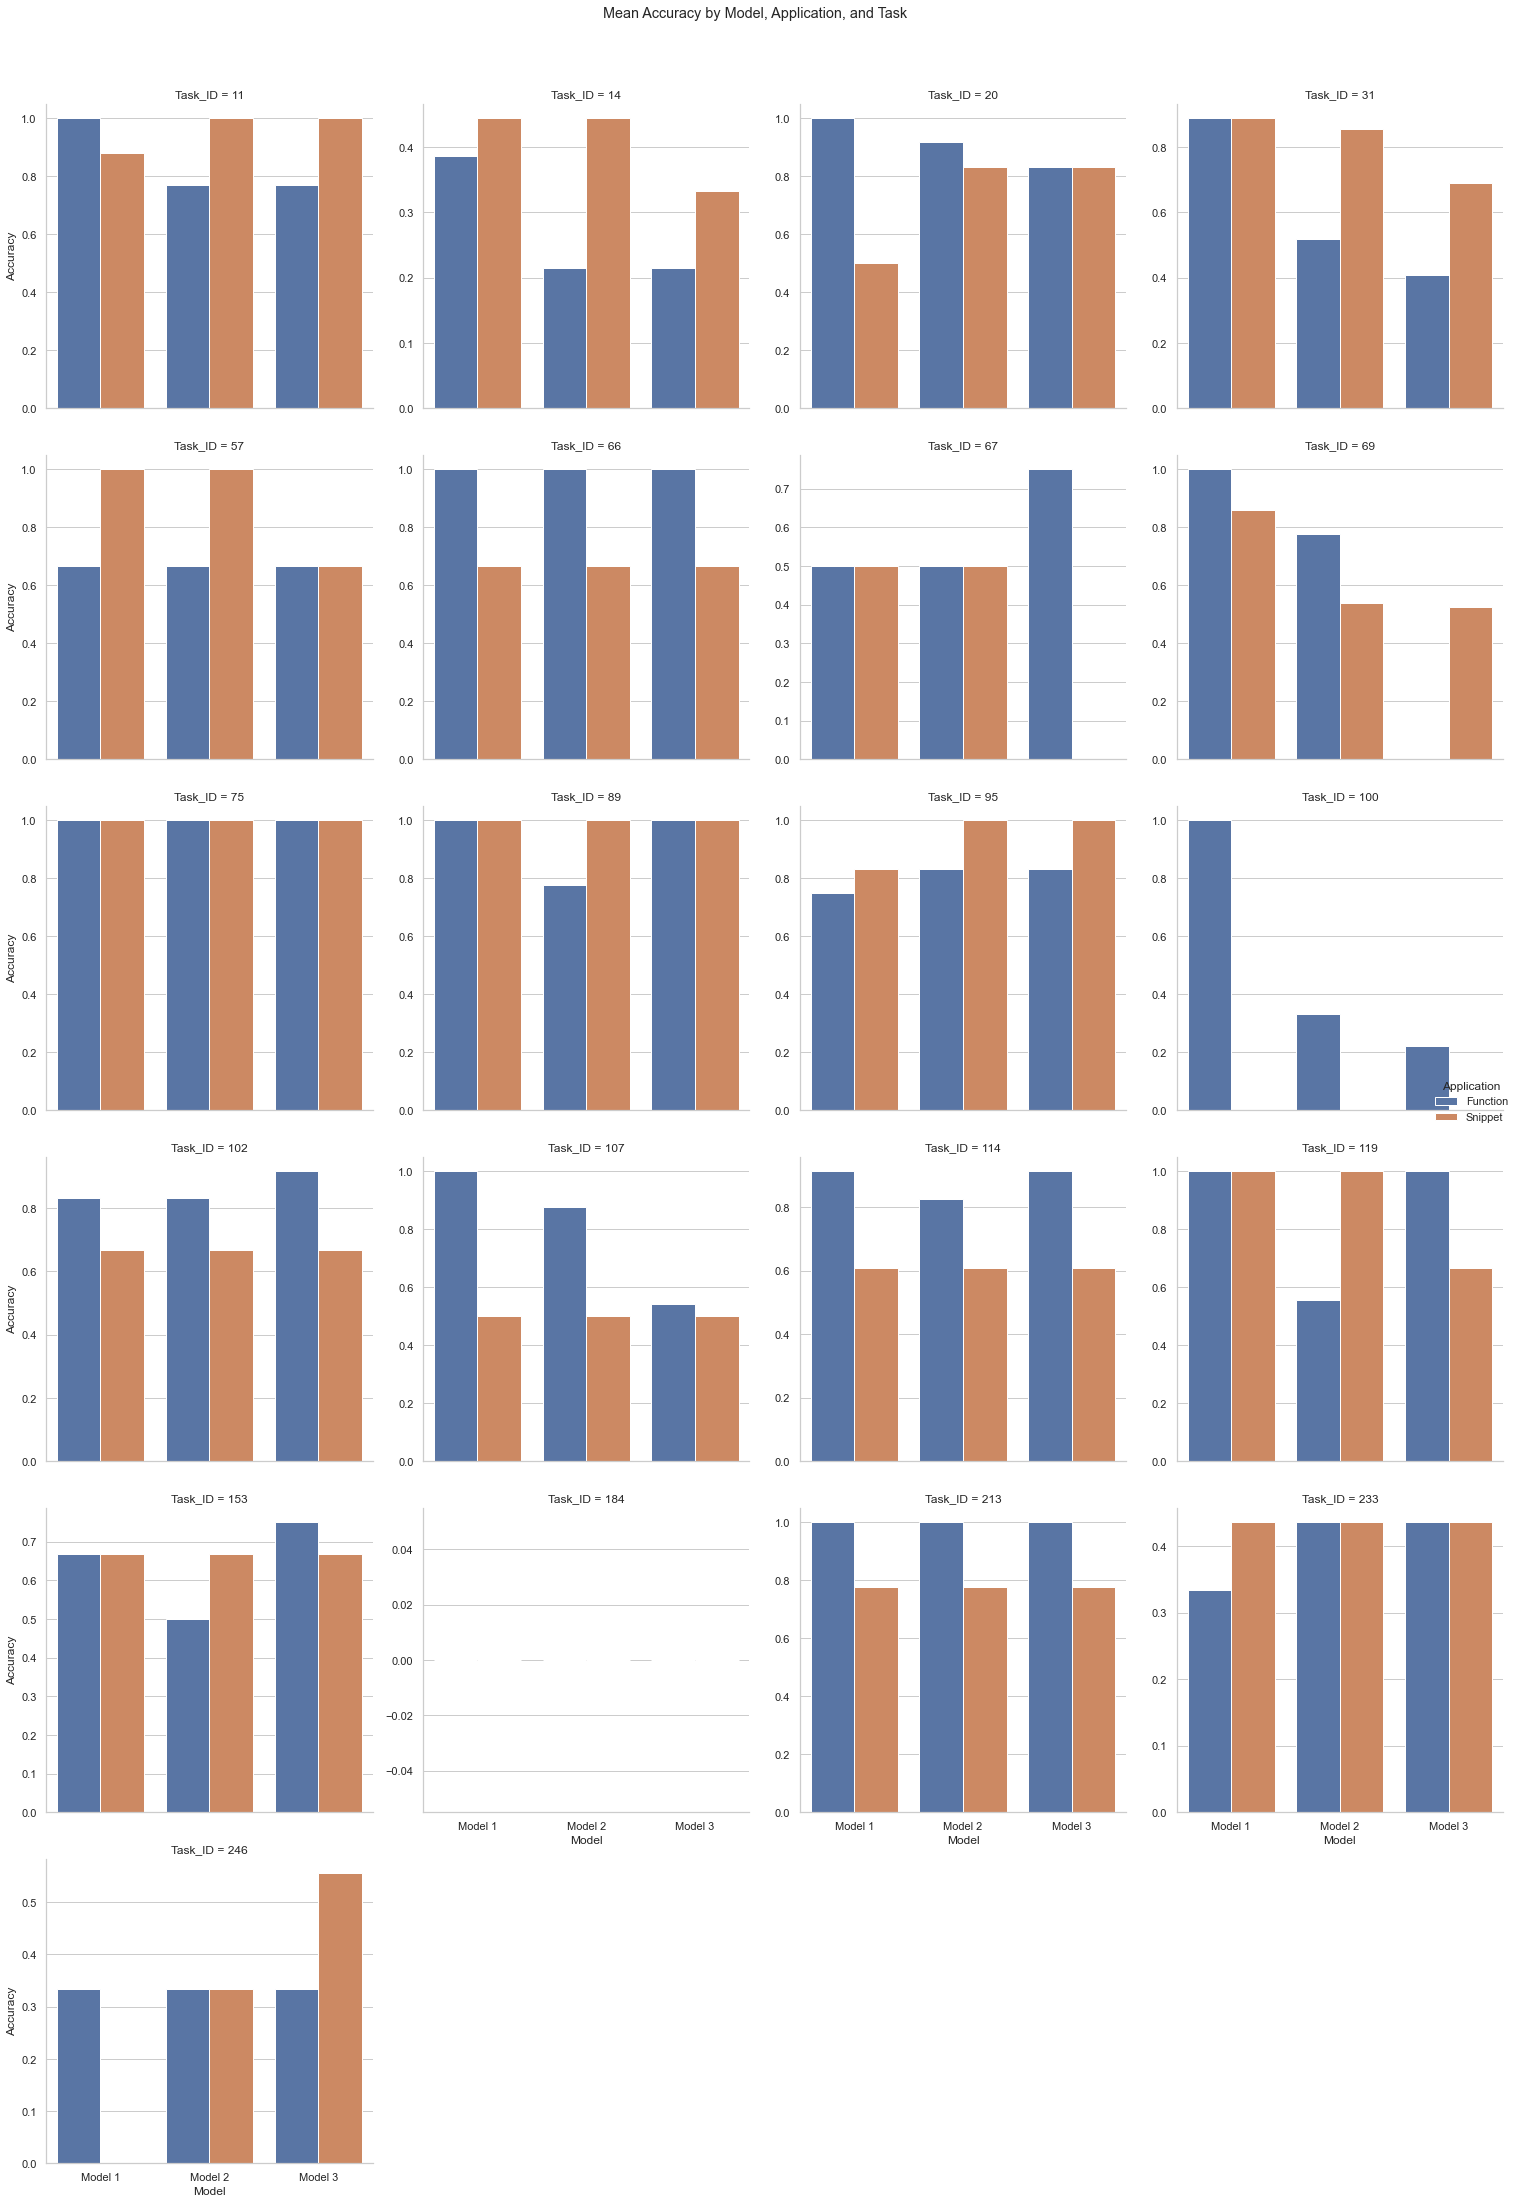

In [91]:
# Do some models consistently perform better on specific applications (Function vs. Snippet) or tasks (identified by Task_ID)?

# Group the DataFrame by 'Model', 'Application', and 'Task_ID' and calculate the mean of each metric
model_application_task_performance = combined_df.groupby(['Model', 'Application', 'Task_ID']).mean()

model_application_task_performance.reset_index(inplace=True)

# Visualize the performance metrics for each model, application, and task
plt.figure(figsize=(12, 6))
sns.catplot(x='Model', y='Accuracy', hue='Application', col='Task_ID', col_wrap=4,
            data=model_application_task_performance, kind='bar', ci=None, sharey=False)
plt.suptitle('Mean Accuracy by Model, Application, and Task', y=1.02)
plt.tight_layout()
plt.show()


In [59]:
print(model_application_task_performance)

       Model Application  Task_ID  ChatGPT_Reponse_Time  Execution_Time  \
0    Model 1    Function       11              8.110000        0.023174   
1    Model 1    Function       14              6.710000        0.003373   
2    Model 1    Function       20              7.035000        0.014267   
3    Model 1    Function       31              9.286667        0.006121   
4    Model 1    Function       57              6.410000        0.030378   
..       ...         ...      ...                   ...             ...   
121  Model 3     Snippet      153              8.015000        0.000000   
122  Model 3     Snippet      184              5.160000        0.015707   
123  Model 3     Snippet      213              4.690000        0.010630   
124  Model 3     Snippet      233              4.220000        0.024977   
125  Model 3     Snippet      246              9.250000        0.000223   

     Accuracy  Precision    Recall  F1_Score  Exact_Match  
0    1.000000   1.000000  1.000000  1.0

In [48]:
# Is there a significant difference in execution time between models for the same task?

from scipy.stats import kruskal

# Group the execution time data by model
model_exec_times = [combined_df[combined_df['Model'] == model]['Execution_Time'] for model in combined_df['Model'].unique()]

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(*model_exec_times)

# Print the results
print("Kruskal-Wallis H Test:")
print("H-statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("There is a significant difference in execution time between models for the same task.")
else:
    print("There is no significant difference in execution time between models for the same task.")


Kruskal-Wallis H Test:
H-statistic: 2.344690539413829
p-value: 0.3096398999673182
There is no significant difference in execution time between models for the same task.


In [49]:
# Which technique (CoT, Zero Shot, Few Shot) is most effective on a specific application (Function, Snippet)?

# Group the DataFrame by both 'Technique' and 'Application' and calculate the mean of each metric
technique_application_performance = combined_df.groupby(['Technique', 'Application']).mean()

technique_application_performance.reset_index(inplace=True)

# Print the mean performance metrics for each technique and application
print(technique_application_performance)


   Technique Application     Task_ID  ChatGPT_Reponse_Time  Execution_Time  \
0        CoT    Function  103.095238              6.973175        0.067328   
1        CoT     Snippet   93.357143              9.791429        0.000454   
2   Few Shot    Function  103.095238              7.830794        0.136699   
3   Few Shot     Snippet   93.357143              7.304048        0.000215   
4  Zero Shot    Function  100.333333              7.097284        0.079120   
5  Zero Shot     Snippet  108.066667              5.870000        1.371851   

   Accuracy  Precision    Recall  F1_Score  Exact_Match  
0  0.696984   0.668254  0.666931  0.667513     0.656085  
1  0.563492   0.563492  0.563492  0.563492     0.563492  
2  0.788413   0.792540  0.806349  0.796667     0.740741  
3  0.785714   0.769841  0.769841  0.769841     0.769841  
4  0.627572   0.627572  0.627572  0.611070     0.580247  
5  0.579630   0.555556  0.555556  0.555556     0.607407  


### Conclusion

In conclusion, this project investigated the effectiveness of prompt engineering in enhancing Large Language Models (LLMs) for code generation within technology education. Our experiments measured code generation accuracy using various prompting techniques. We established a zero-shot prompting baseline (without supplemental information) and developed a framework outlining different prompt types, effective techniques for crafting prompts from datasets, and best practices. 

Our key finding is that few-shot prompting, which provides examples alongside prompts, significantly improved LLM performance. Compared to the zero-shot baseline (62.7% function generation, 57.9% snippet generation), few-shot prompting achieved 78.5% accuracy for function generation and 71.7% for snippets. 
